# Import packages we will use

In [169]:
import pandas as pd
import plotly.express as px

# read in the files we will look at

In [170]:
indir="../testdata/"
df = pd.read_csv(indir+"psea_scores_20240923-152820.adjpval.csv", index_col=0)
genedf = pd.read_csv(indir+"genes.csv", index_col=0)

In [171]:
genedf["value"]=genedf["gene_id"]

# Look at the files

In [172]:
df[["binary_attribute", "value", "NES", "p_value_BenjaminiHochberg"]]

,binary_attribute,value,NES,p_value_BenjaminiHochberg
24553,patent_foramen_ovale,ENSG00000232010,-5.964690,1.113375e-07
24239,patent_foramen_ovale,ENSG00000183255,5.575281,2.135788e-06
20802,obesity_disorder,ENSG00000155307,-5.458382,3.542007e-06
24578,patent_foramen_ovale,ENSG00000233056,-5.329486,3.838521e-05
24818,patent_foramen_ovale,ENSG00000277117,-5.238081,3.838521e-05
...,...,...,...,...
121321,Tourette_syndrome,ENSG00000283051,NaN,NaN
121322,Tourette_syndrome,ENSG00000283300,NaN,NaN
121323,Tourette_syndrome,ENSG00000283904,NaN,NaN
121324,Tourette_syndrome,ENSG00000284448,NaN,NaN


In [173]:
df[df["value"]=="ENSG00000159200"]

,binary_attribute,value,runpsea,NES,pval,p_value_bonf,p_value_holm,p_value_BenjaminiHochberg,p_value_BenjaminiYekutieli
17509,respiratory_system_disorder,ENSG00000159200,included,-3.933645,0.000028,0.464375,0.460504,0.003293,0.033943
3382,obstructive_sleep_apnea_syndrome,ENSG00000159200,included,-3.763962,0.000063,1.000000,1.000000,0.005570,0.057409
20833,obesity_disorder,ENSG00000159200,included,-0.494431,0.741041,1.000000,1.000000,0.914966,1.000000
22495,digestive_system_disorder,ENSG00000159200,included,-0.433279,0.781037,1.000000,1.000000,0.914966,1.000000
21664,folliculitis,ENSG00000159200,included,-0.220799,0.838267,1.000000,1.000000,0.914966,1.000000
...,...,...,...,...,...,...,...,...,...
117229,schizophrenia,ENSG00000159200,excluded,NaN,NaN,NaN,NaN,NaN,NaN
118060,separation_anxiety_disorder,ENSG00000159200,excluded,NaN,NaN,NaN,NaN,NaN,NaN
118891,stereotypic_movement_disorder,ENSG00000159200,excluded,NaN,NaN,NaN,NaN,NaN,NaN
119722,testicular_cancer,ENSG00000159200,excluded,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
df_nona = df.dropna()

# Most genes don't vary with most comorbiditys


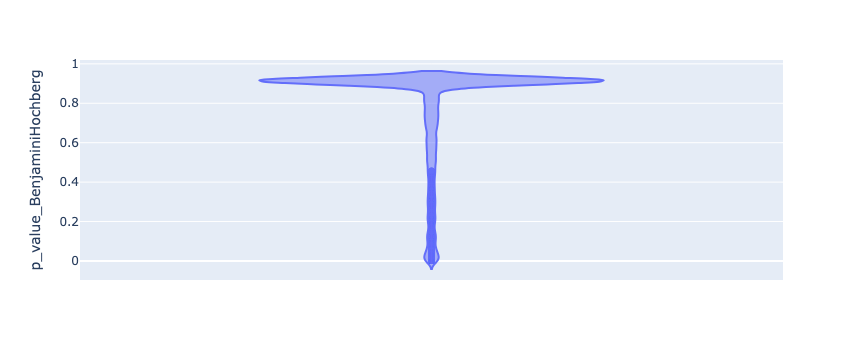

In [175]:
fig = px.violin(df_nona, y="p_value_BenjaminiHochberg")
fig.show()


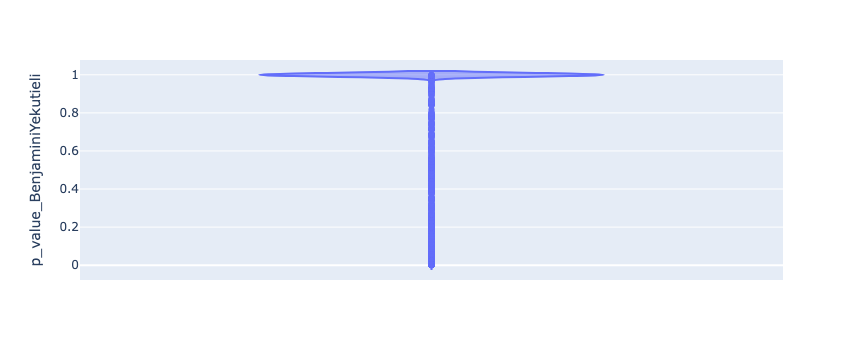

In [176]:
fig = px.violin(df_nona, y="p_value_BenjaminiYekutieli")
fig.show()

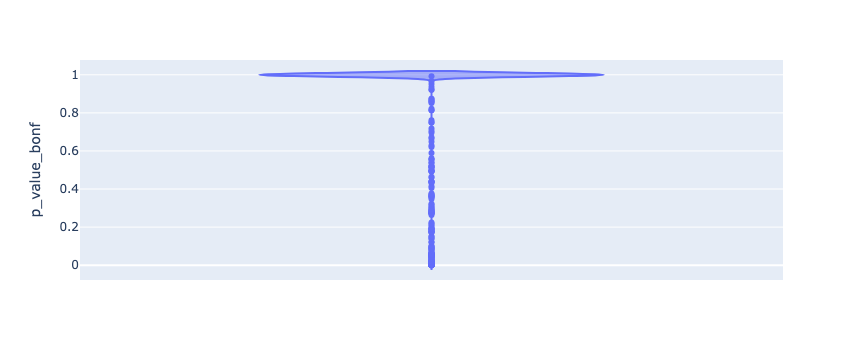

In [177]:
fig = px.violin(df_nona, y="p_value_bonf")
fig.show()


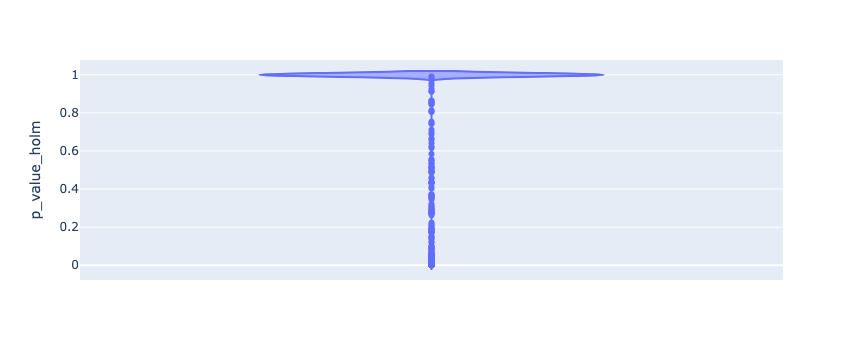

In [178]:
fig = px.violin(df_nona, y="p_value_holm")
fig.show()


# Find pairs predicted by PSEA

In [179]:
df_nona_threshold = df_nona[df_nona["p_value_BenjaminiHochberg"]<0.1]

In [180]:
df_nona_threshold

,binary_attribute,value,runpsea,NES,pval,p_value_bonf,p_value_holm,p_value_BenjaminiHochberg,p_value_BenjaminiYekutieli
24553,patent_foramen_ovale,ENSG00000232010,included,-5.964690,6.628414e-12,1.113375e-07,1.113375e-07,1.113375e-07,0.000001
24239,patent_foramen_ovale,ENSG00000183255,included,5.575281,2.543059e-10,4.271576e-06,4.271322e-06,2.135788e-06,0.000022
20802,obesity_disorder,ENSG00000155307,included,-5.458382,6.326142e-10,1.062602e-05,1.062476e-05,3.542007e-06,0.000037
24578,patent_foramen_ovale,ENSG00000233056,included,-5.329486,1.273144e-08,2.138500e-04,2.137991e-04,3.838521e-05,0.000396
24818,patent_foramen_ovale,ENSG00000277117,included,-5.238081,1.371145e-08,2.303113e-04,2.302427e-04,3.838521e-05,0.000396
...,...,...,...,...,...,...,...,...,...
13877,depressive_disorder,ENSG00000240770,included,-2.985978,4.946637e-03,1.000000e+00,1.000000e+00,9.911490e-02,1.000000
8085,skin_disorder,ENSG00000251972,included,2.937849,4.822396e-03,1.000000e+00,1.000000e+00,9.746812e-02,1.000000
10715,otorhinolaryngologic_disease,ENSG00000278903,included,-2.863893,4.941869e-03,1.000000e+00,1.000000e+00,9.911490e-02,1.000000
10014,otorhinolaryngologic_disease,ENSG00000157551,included,2.901477,4.971542e-03,1.000000e+00,1.000000e+00,9.941309e-02,1.000000


In [181]:
df_nona_threshold_names = df_nona_threshold.merge(genedf, how ="inner", on="value")
df_nona_threshold_names

,binary_attribute,value,runpsea,NES,pval,p_value_bonf,p_value_holm,p_value_BenjaminiHochberg,p_value_BenjaminiYekutieli,seqnames,...,end,width,strand,source,type,gene_id,gene_version,gene_name,gene_source,gene_biotype
0,patent_foramen_ovale,ENSG00000232010,included,-5.964690,6.628414e-12,1.113375e-07,1.113375e-07,1.113375e-07,0.000001,21,...,44251520,708,+,havana,gene,ENSG00000232010,1,AP001059.1,havana,antisense
1,patent_foramen_ovale,ENSG00000183255,included,5.575281,2.543059e-10,4.271576e-06,4.271322e-06,2.135788e-06,0.000022,21,...,44873903,24319,-,ensembl_havana,gene,ENSG00000183255,11,PTTG1IP,ensembl_havana,protein_coding
2,obesity_disorder,ENSG00000155307,included,-5.458382,6.326142e-10,1.062602e-05,1.062476e-05,3.542007e-06,0.000037,21,...,14658821,173594,-,ensembl_havana,gene,ENSG00000155307,18,SAMSN1,ensembl_havana,protein_coding
3,patent_foramen_ovale,ENSG00000233056,included,-5.329486,1.273144e-08,2.138500e-04,2.137991e-04,3.838521e-05,0.000396,21,...,42925646,8844,-,ensembl_havana,gene,ENSG00000233056,2,ERVH48-1,ensembl_havana,lincRNA
4,patent_foramen_ovale,ENSG00000277117,included,-5.238081,1.371145e-08,2.303113e-04,2.302427e-04,3.838521e-05,0.000396,21,...,5040666,18174,+,ensembl_havana,gene,ENSG00000277117,4,FP565260.3,ensembl_havana,protein_coding
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,depressive_disorder,ENSG00000240770,included,-2.985978,4.946637e-03,1.000000e+00,1.000000e+00,9.911490e-02,1.000000,21,...,17792523,29209,-,havana,gene,ENSG00000240770,5,C21orf91-OT1,havana,lincRNA
837,skin_disorder,ENSG00000251972,included,2.937849,4.822396e-03,1.000000e+00,1.000000e+00,9.746812e-02,1.000000,21,...,25943145,102,-,ensembl,gene,ENSG00000251972,1,RNU6-123P,ensembl,snRNA
838,otorhinolaryngologic_disease,ENSG00000278903,included,-2.863893,4.941869e-03,1.000000e+00,1.000000e+00,9.911490e-02,1.000000,21,...,6360415,41982,+,ensembl_havana,gene,ENSG00000278903,3,CU633906.2,ensembl_havana,lincRNA
839,otorhinolaryngologic_disease,ENSG00000157551,included,2.901477,4.971542e-03,1.000000e+00,1.000000e+00,9.941309e-02,1.000000,21,...,38307357,151809,+,ensembl_havana,gene,ENSG00000157551,18,KCNJ15,ensembl_havana,protein_coding


# How many binary_attribute do we pair

In [182]:
df_nona_threshold_names["binary_attribute"].value_counts()

binary_attribute
patent_foramen_ovale                        103
otorhinolaryngologic_disease                 79
skeletal_system_disorder                     73
obstructive_sleep_apnea_syndrome             67
patent_ductus_arteriosus                     60
respiratory_system_disorder                  44
nervous_system_disorder                      37
obesity_disorder                             34
asthma                                       32
eye_disorder                                 31
ventricular_septal_defect                    27
gastroesophageal_reflux_disease              24
depressive_disorder                          23
atopic_eczema                                23
digestive_system_disorder                    20
sleep_apnea_syndrome                         17
hypothyroidism                               17
eustachian_tube_disorder                     16
heart_disorder                               15
atrioventricular_septal_defect               14
anxiety                

# How many values (genes) do we pair

In [183]:
df_nona_threshold_names["gene_name"].value_counts()

gene_name
RF01518       12
MIR155HG      11
URB1           9
TRAPPC10       9
SLC19A1        8
              ..
AP001172.1     1
FBXW11P1       1
ZNF295-AS1     1
IGSF5          1
AP001052.1     1
Name: count, Length: 335, dtype: int64

# Pick a value to look at

In [215]:
#agene = "RCAN1"
#agene = "PRMT2"
#agene = "IFNAR2"
#agene="ETS2"
agene="RUNX1"
agene_df = df_nona_threshold_names[df_nona_threshold_names["gene_name"]==agene]
agene_df = agene_df.sort_values(["NES"])
agene_df

,binary_attribute,value,runpsea,NES,pval,p_value_bonf,p_value_holm,p_value_BenjaminiHochberg,p_value_BenjaminiYekutieli,seqnames,...,width,strand,source,type,gene_id,gene_version,gene_name,gene_source,gene_biotype,high_get_disorder
63,gastroesophageal_reflux_disease,ENSG00000159216,included,-4.320273,0.000003,0.045777,0.045608,0.000724,0.007458,21,...,1216867,-,ensembl_havana,gene,ENSG00000159216,18,RUNX1,ensembl_havana,protein_coding,True
219,sleep_apnea_syndrome,ENSG00000159216,included,-3.696589,0.000113,1.000000,1.000000,0.008594,0.088573,21,...,1216867,-,ensembl_havana,gene,ENSG00000159216,18,RUNX1,ensembl_havana,protein_coding,True
774,otorhinolaryngologic_disease,ENSG00000159216,included,-2.977548,0.004063,1.000000,1.000000,0.088074,0.907705,21,...,1216867,-,ensembl_havana,gene,ENSG00000159216,18,RUNX1,ensembl_havana,protein_coding,True
826,skeletal_system_disorder,ENSG00000159216,included,-2.953768,0.004737,1.000000,1.000000,0.096780,0.997430,21,...,1216867,-,ensembl_havana,gene,ENSG00000159216,18,RUNX1,ensembl_havana,protein_coding,True
759,heart_disorder,ENSG00000159216,included,3.125360,0.003778,1.000000,1.000000,0.083395,0.859487,21,...,1216867,-,ensembl_havana,gene,ENSG00000159216,18,RUNX1,ensembl_havana,protein_coding,False


# Pick a binary_attribute to look at

In [221]:
acondition = "constipation_disorder"
#acondition = "strabismus"
aconditiondf = df_nona_threshold_names[df_nona_threshold_names["binary_attribute"]==acondition]
aconditiondf = aconditiondf.sort_values(["NES"])
aconditiondf

,binary_attribute,value,runpsea,NES,pval,p_value_bonf,p_value_holm,p_value_BenjaminiHochberg,p_value_BenjaminiYekutieli,seqnames,...,width,strand,source,type,gene_id,gene_version,gene_name,gene_source,gene_biotype,high_get_disorder
133,constipation_disorder,ENSG00000198618,included,-3.871806,0.000025,0.41439,0.411109,0.003092,0.031872,21,...,498,+,havana,gene,ENSG00000198618,5,PPIAP22,havana,processed_pseudogene,True
226,constipation_disorder,ENSG00000154646,included,-3.810091,0.000119,1.00000,1.000000,0.008795,0.090643,21,...,216764,-,ensembl_havana,gene,ENSG00000154646,8,TMPRSS15,ensembl_havana,protein_coding,True
546,constipation_disorder,ENSG00000160223,included,-3.363824,0.001487,1.00000,1.000000,0.045756,0.471571,21,...,23953,-,ensembl_havana,gene,ENSG00000160223,17,ICOSLG,ensembl_havana,protein_coding,True
684,constipation_disorder,ENSG00000272948,included,-3.007369,0.002721,1.00000,1.000000,0.066873,0.689205,21,...,714,+,havana,gene,ENSG00000272948,2,AP001412.1,havana,antisense,True
592,constipation_disorder,ENSG00000205927,included,3.121629,0.001789,1.00000,1.000000,0.050685,0.522374,21,...,3352,+,ensembl_havana,gene,ENSG00000205927,4,OLIG2,ensembl_havana,protein_coding,False
591,constipation_disorder,ENSG00000226043,included,3.123924,0.001788,1.00000,1.000000,0.050685,0.522374,21,...,210881,+,havana,gene,ENSG00000226043,1,AP000561.1,havana,lincRNA,False
471,constipation_disorder,ENSG00000197934,included,3.347971,0.001066,1.00000,1.000000,0.037814,0.389718,21,...,175618,+,havana,gene,ENSG00000197934,8,CYYR1-AS1,havana,antisense,False


In [222]:
high_get_aconditiondf = aconditiondf[aconditiondf["NES"]<0]
high_get_aconditiondf

,binary_attribute,value,runpsea,NES,pval,p_value_bonf,p_value_holm,p_value_BenjaminiHochberg,p_value_BenjaminiYekutieli,seqnames,...,width,strand,source,type,gene_id,gene_version,gene_name,gene_source,gene_biotype,high_get_disorder
133,constipation_disorder,ENSG00000198618,included,-3.871806,0.000025,0.41439,0.411109,0.003092,0.031872,21,...,498,+,havana,gene,ENSG00000198618,5,PPIAP22,havana,processed_pseudogene,True
226,constipation_disorder,ENSG00000154646,included,-3.810091,0.000119,1.00000,1.000000,0.008795,0.090643,21,...,216764,-,ensembl_havana,gene,ENSG00000154646,8,TMPRSS15,ensembl_havana,protein_coding,True
546,constipation_disorder,ENSG00000160223,included,-3.363824,0.001487,1.00000,1.000000,0.045756,0.471571,21,...,23953,-,ensembl_havana,gene,ENSG00000160223,17,ICOSLG,ensembl_havana,protein_coding,True
684,constipation_disorder,ENSG00000272948,included,-3.007369,0.002721,1.00000,1.000000,0.066873,0.689205,21,...,714,+,havana,gene,ENSG00000272948,2,AP001412.1,havana,antisense,True


In [223]:
high_get_aconditiondf["gene_name"].to_list()

['PPIAP22', 'TMPRSS15', 'ICOSLG', 'AP001412.1']

In [224]:
high_donot_have_aconditiondf = aconditiondf[aconditiondf["NES"]>0]
high_donot_have_aconditiondf

,binary_attribute,value,runpsea,NES,pval,p_value_bonf,p_value_holm,p_value_BenjaminiHochberg,p_value_BenjaminiYekutieli,seqnames,...,width,strand,source,type,gene_id,gene_version,gene_name,gene_source,gene_biotype,high_get_disorder
592,constipation_disorder,ENSG00000205927,included,3.121629,0.001789,1.0,1.0,0.050685,0.522374,21,...,3352,+,ensembl_havana,gene,ENSG00000205927,4,OLIG2,ensembl_havana,protein_coding,False
591,constipation_disorder,ENSG00000226043,included,3.123924,0.001788,1.0,1.0,0.050685,0.522374,21,...,210881,+,havana,gene,ENSG00000226043,1,AP000561.1,havana,lincRNA,False
471,constipation_disorder,ENSG00000197934,included,3.347971,0.001066,1.0,1.0,0.037814,0.389718,21,...,175618,+,havana,gene,ENSG00000197934,8,CYYR1-AS1,havana,antisense,False


In [225]:
high_donot_have_aconditiondf["gene_name"].to_list()

['OLIG2', 'AP000561.1', 'CYYR1-AS1']

# Are most effects of genes being to high?

In [206]:
df_nona_threshold_names["high_get_disorder"] = df_nona_threshold_names["NES"]<0

In [214]:
#df.groupby('Company Name')['Amount'].agg(['sum','count'])
n_genes_associated = df_nona_threshold_names.groupby('binary_attribute')["high_get_disorder"].agg(['count', 'sum'])
n_genes_associated.columns = ["total_genes_associated", "high_genes_associated"]
n_genes_associated = n_genes_associated.sort_values(["high_genes_associated"], ascending=False)
n_genes_associated["low_genes_associated"] = n_genes_associated["total_genes_associated"]-n_genes_associated["high_genes_associated"]
n_genes_associated


,total_genes_associated,high_genes_associated,low_genes_associated
binary_attribute,,,
patent_foramen_ovale,103,70,33
otorhinolaryngologic_disease,79,60,19
obstructive_sleep_apnea_syndrome,67,48,19
patent_ductus_arteriosus,60,41,19
skeletal_system_disorder,73,39,34
respiratory_system_disorder,44,29,15
nervous_system_disorder,37,28,9
obesity_disorder,34,17,17
gastroesophageal_reflux_disease,24,14,10
